#### Load The Libraries

In [101]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext line_profiler
sns.set_style('darkgrid')
plt.style.use('seaborn-white')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


#### Load the dataset

In [119]:
dataset = pd.read_csv('Dataset/Train.csv')
test_dataset = pd.read_csv('Dataset/Test.csv')
dataset_copy = dataset.copy(deep = True)

#### Peek into the dataset

In [115]:
print(dataset.shape,test_dataset.shape)

(7000, 24) (3000, 23)


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [45]:
print(dataset.head(20))

   Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0    EID_23371      F  42.0                4             Married     Franklin   
1    EID_18000      M  24.0                3              Single  Springfield   
2     EID_3891      F  58.0                3             Married      Clinton   
3    EID_17492      F  26.0                3              Single      Lebanon   
4    EID_22534      F  31.0                1             Married  Springfield   
5     EID_2278      M  54.0                3             Married      Lebanon   
6    EID_18588      F  21.0                4             Married  Springfield   
7     EID_1235      F   NaN                3             Married  Springfield   
8    EID_10197      M  40.0                4              Single  Springfield   
9    EID_21262      M  45.0                3             Married      Lebanon   
10    EID_9153      F  65.0                5              Single      Lebanon   
11   EID_19087      F  19.0 

In [46]:
dataset.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [7]:
# Convert object datatype to string

#### Unimodal Distribution

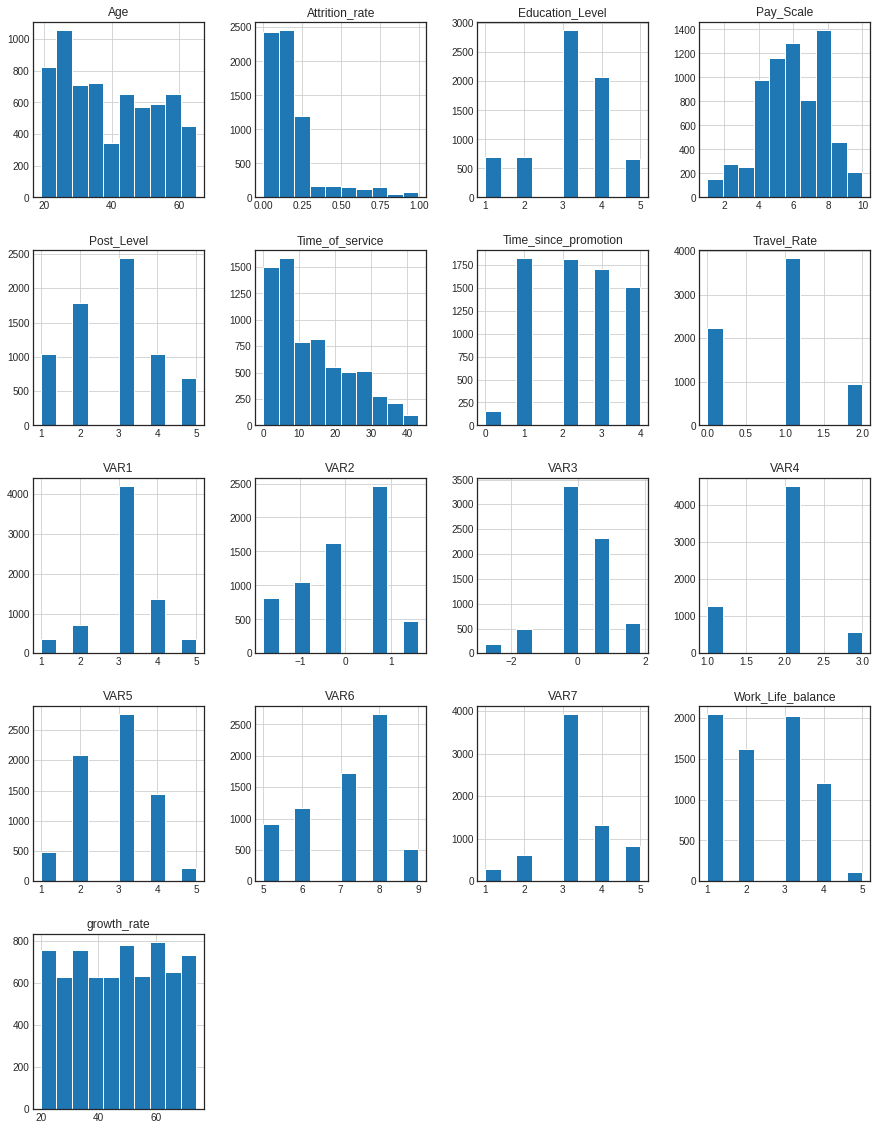

In [17]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

#### Multimodal Distribution

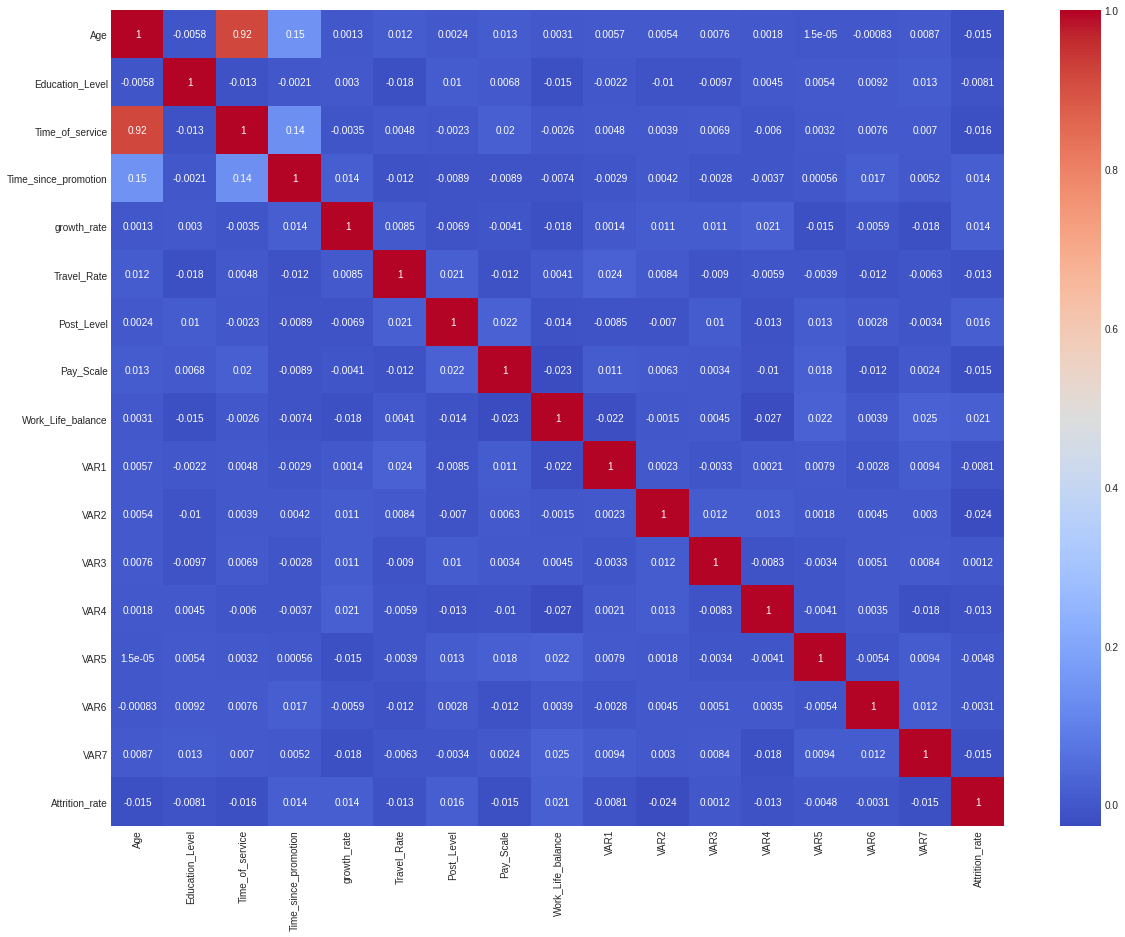

In [18]:
# Correlation Matrix
plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr(), cmap='coolwarm',annot=True)

#### Feature Engineering

In [120]:
def change_eid(name):
    name = name[4:]
    return name

In [121]:
def new_eid(df):
    df['EID'] = df.apply(lambda row: change_id(row['Employee_ID']), axis=1)
new_eid(dataset)
new_eid(dataset_copy)
new_eid(test_dataset)

In [122]:
original_eid = test_dataset['Employee_ID']
dataset.drop(columns='Employee_ID',axis=1,inplace=True)
dataset_copy.drop(columns='Employee_ID',axis=1,inplace=True)
test_dataset.drop(columns='Employee_ID',axis=1,inplace=True)
dataset.head(20)
dataset_copy.head(20)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,EID
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,23371
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,18000
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,3891
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,17492
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,22534
5,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,...,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613,2278
6,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,50,...,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819,18588
7,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,...,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169,1235
8,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,...,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968,10197
9,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,34,...,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870,21262


In [123]:
dataset_copy['EID'] = dataset_copy['EID'].apply(pd.to_numeric)
test_dataset['EID'] = dataset_copy['EID'].apply(pd.to_numeric)

In [124]:
dataset_copy.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
EID                            int64
dtype: object

In [125]:
dataset_copy = dataset_copy.select_dtypes(exclude=['object'])
test_dataset = test_dataset.select_dtypes(exclude=['object'])

In [126]:
Y = dataset_copy['Attrition_rate']
X = dataset_copy.drop(columns='Attrition_rate', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [127]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [128]:
# Spot check algorithms
pipeline_imputer = [
    ('ImputeLR',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('LR', LinearRegression())])),
    ('ImputeLasso',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('LASSO',Lasso())])),
    ('ImputeEN',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('EN',ElasticNet())])),
    ('ImputeCART',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('CART',DecisionTreeRegressor())])),
    ('ImputeKNN',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('KNN',KNeighborsRegressor())])),
    ('ImputeSVM',Pipeline([('Imputer', SimpleImputer(strategy='mean')),('SVM',SVR())]))
]

In [129]:
%%time
results = []
names = []
for name, model in pipeline_imputer:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.3f} ({2:.3f})'.format(name, cv_results.mean(), cv_results.std()))

ImputeLR : -0.034 (0.002)
ImputeLasso : -0.033 (0.002)
ImputeEN : -0.033 (0.002)
ImputeCART : -0.072 (0.007)
ImputeKNN : -0.040 (0.003)
ImputeSVM : -0.036 (0.002)
CPU times: user 13.8 s, sys: 296 ms, total: 14.1 s
Wall time: 12.9 s


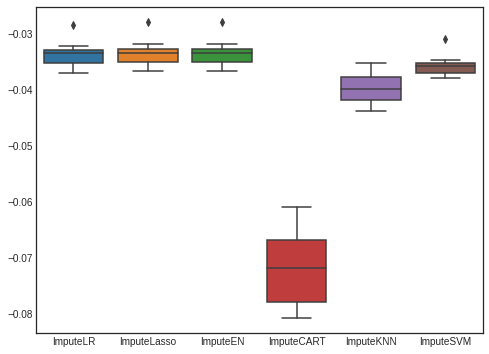

In [130]:
plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=results)

In [148]:
ensembles = []
ensembles.append(('ImputedAB', Pipeline([('Imputer', SimpleImputer(strategy='mean')),('AB',
AdaBoostRegressor())])))
ensembles.append(('ImputedGBM', Pipeline([('Imputer', SimpleImputer(strategy='mean')),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ImputedRF', Pipeline([('Imputer', SimpleImputer(strategy='mean')),('RF',
RandomForestRegressor())])))
ensembles.append(('ImputedET', Pipeline([('Imputer', SimpleImputer(strategy='mean')),('ET',
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.3f} ({2:.3f})'.format(name, cv_results.mean(), cv_results.std()))


ImputedAB : -0.041 (0.003)
ImputedGBM : -0.035 (0.002)
ImputedRF : -0.039 (0.003)
ImputedET : -0.039 (0.002)


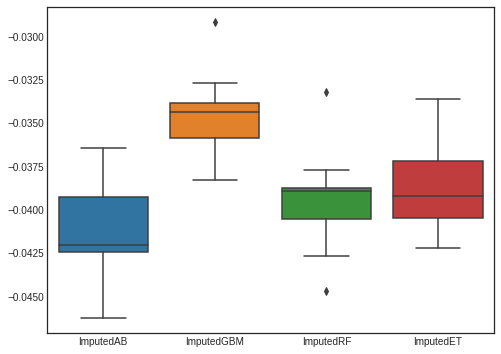

In [149]:
plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=results)

In [152]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
imputer = SimpleImputer(strategy='mean').fit(X_train)
imputedX = imputer.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(imputedX, Y_train)

print('Best {0:.3f} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
print('\n')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('{0:.3f} ({1:.3f}) with {2}'.format(mean,std,param))

Best -0.034 using {'n_estimators': 50}


-0.034 (0.002) with {'n_estimators': 50}
-0.035 (0.002) with {'n_estimators': 100}
-0.035 (0.002) with {'n_estimators': 150}
-0.035 (0.003) with {'n_estimators': 200}
-0.035 (0.003) with {'n_estimators': 250}
-0.036 (0.003) with {'n_estimators': 300}
-0.036 (0.003) with {'n_estimators': 350}
-0.036 (0.003) with {'n_estimators': 400}


In [110]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
imputer = SimpleImputer(strategy='mean').fit(X_train)
imputedX = imputer.transform(X_train)
model = ElasticNet(random_state=seed)
model.fit(imputedX, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=7, selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
scalevalX = scaler.transform(X_test)
imputevalX = imputer.transform(scalevalX)
predictions = model.predict(imputevalX)
print(mean_squared_error(Y_test, predictions))

0.03681536397715271


In [154]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
imputer = SimpleImputer(strategy='mean').fit(X_train)
imputedX = imputer.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(imputedX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
scalevalX = scaler.transform(X_test)
imputevalX = imputer.transform(scalevalX)
predictions = model.predict(imputevalX)
print(mean_squared_error(Y_test, predictions))

0.32092145027634333


In [156]:
scaletestX = scaler.transform(test_dataset)
#print(len(scaletestX))
imputetestX = imputer.transform(test_dataset)
#print(len(imputetestX))
predictions = model.predict(imputetestX)
#print(len(predictions),len(original_eid))

In [157]:
submission = pd.DataFrame({'Employee_ID' :original_eid,
                           'Attrition_rate' : predictions})
submission.head(10)

,Employee_ID,Attrition_rate
0,EID_22713,0.195009
1,EID_9658,0.220732
2,EID_22203,0.178447
3,EID_7652,0.191723
4,EID_6516,0.187362
5,EID_20283,0.190709
6,EID_21014,0.189132
7,EID_7693,0.178684
8,EID_13232,0.215430
9,EID_6515,0.175699


In [158]:
submission.to_csv('Employee.csv',index=False)